In [1]:
import pandas as pd

df_yield = pd.read_csv('yield_merged.csv')
df_yield

,Area,Item,Year,Value,Pesticides,average_rain_fall,avg_temp
0,Albania,Barley,1990,1000.0,121.00,1485.0,16.37
1,Albania,Barley,1991,923.1,121.00,1485.0,15.36
2,Albania,Barley,1992,1380.2,121.00,1485.0,16.06
3,Albania,Barley,1993,1332.4,121.00,1485.0,16.05
4,Albania,Barley,1994,2352.3,201.00,1485.0,16.96
...,...,...,...,...,...,...,...
36737,Zimbabwe,Wheat,2009,3000.0,3269.99,657.0,20.52
36738,Zimbabwe,Wheat,2010,2778.8,3305.17,657.0,21.17
36739,Zimbabwe,Wheat,2011,2660.4,3340.35,657.0,20.78
36740,Zimbabwe,Wheat,2012,2490.2,3375.53,657.0,20.52


In [2]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36742 entries, 0 to 36741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               36742 non-null  object 
 1   Item               36742 non-null  object 
 2   Year               36742 non-null  int64  
 3   Value              36742 non-null  float64
 4   Pesticides         36742 non-null  float64
 5   average_rain_fall  36742 non-null  float64
 6   avg_temp           36742 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.0+ MB


In [3]:
df_yield.describe()

,Year,Value,Pesticides,average_rain_fall,avg_temp
count,36742.000000,36742.000000,36742.000000,36742.000000,36742.000000
mean,2001.584998,4555.354434,78458.476491,964.045017,18.267476
std,7.044926,6200.686299,106625.281030,627.103067,7.106569
min,1990.000000,5.000000,0.660000,51.000000,-3.370000
25%,1995.000000,1354.800000,3897.000000,600.000000,12.880000
50%,2001.000000,2428.150000,29696.720000,661.000000,18.520000
75%,2008.000000,4554.375000,84799.000000,1150.000000,25.330000
max,2013.000000,50141.200000,472977.150000,3240.000000,30.650000


In [4]:
df_yield['Area'].nunique()

107

In [5]:
# Calculate skewness
skewness = df_yield['Value'].skew()
print(f"Skewness: {skewness}")

Skewness: 3.0633790209300487


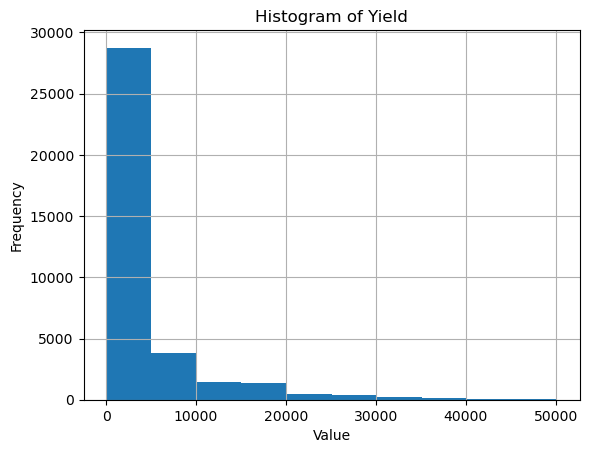

In [6]:
import matplotlib.pyplot as plt

df_yield['Value'].hist(bins=10)
plt.title("Histogram of Yield")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
# Remove Skewness
# Calculate IQR
Q1 = df_yield['Value'].quantile(0.25)
Q3 = df_yield['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_yield = df_yield[(df_yield['Value'] >= lower_bound) & (df_yield['Value'] <= upper_bound)]

df_yield.describe()

,Year,Value,Pesticides,average_rain_fall,avg_temp
count,32352.000000,32352.000000,32352.000000,32352.000000,32352.000000
mean,2001.524543,2595.836548,78986.419193,962.991314,18.342676
std,7.045169,1811.222904,107146.920811,622.913016,7.072661
min,1990.000000,5.000000,0.660000,51.000000,-3.370000
25%,1995.000000,1223.300000,3879.780000,600.000000,13.010000
50%,2001.000000,2096.450000,29696.720000,661.000000,18.650000
75%,2008.000000,3511.100000,88227.600000,1150.000000,25.330000
max,2013.000000,9333.300000,472977.150000,3240.000000,30.650000


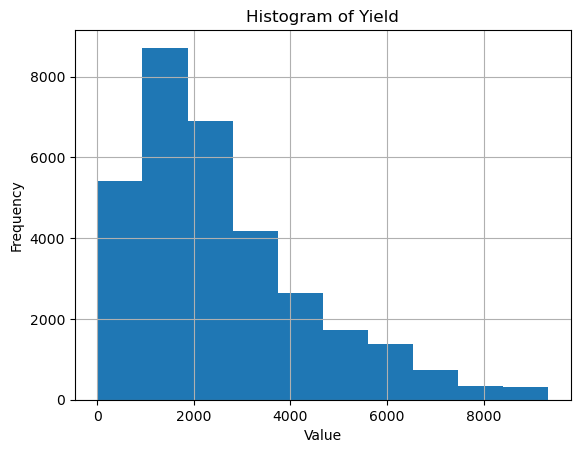

In [8]:
import matplotlib.pyplot as plt

df_yield['Value'].hist(bins=10)
plt.title("Histogram of Yield")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Calculate skewness
skewness = df_yield['Value'].skew()
print(f"Skewness: {skewness}")

Skewness: 1.1826294123456753


In [10]:
# import numpy as np

# df_yield['Value_log'] = np.log(df_yield['Value'] + 1)  # Add 1 to avoid log(0) issue
# df_yield['Value_log'].hist(bins=10)
# plt.title("Histogram of Log-Transformed Yield")
# plt.xlabel("Log(Value)")
# plt.ylabel("Frequency")
# plt.show()

In [11]:
# Unique Countries
print(df_yield['Area'].unique())
print(df_yield['Area'].nunique())

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belarus' 'Belgium' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon' 'Canada'
 'Central African Republic' 'Chile' 'China' 'Colombia' 'Croatia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia'
 'Iraq' 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia'
 'Montenegro' 'Morocco' 'Mozambique' 'Namibia' 'Nepal' 'New Zealand'
 'Nicaragua' 'Niger' 'Nigeria' 'Norway' 'Pakistan' 'Papua New Guinea'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Rwanda'
 'Saudi Arabia' 'Senegal' 'Serbia' 'Sierra Leone' 'Slovenia' 'Somalia'
 'South Africa' '

In [12]:
# Unique Crop 
print(df_yield['Item'].unique())
print(df_yield['Item'].nunique())

['Barley' 'Maize (corn)' 'Oats' 'Potatoes' 'Rice' 'Sorghum' 'Soya beans'
 'Wheat' 'Chick peas, dry' 'Lentils, dry']
10


## Crop yields over time


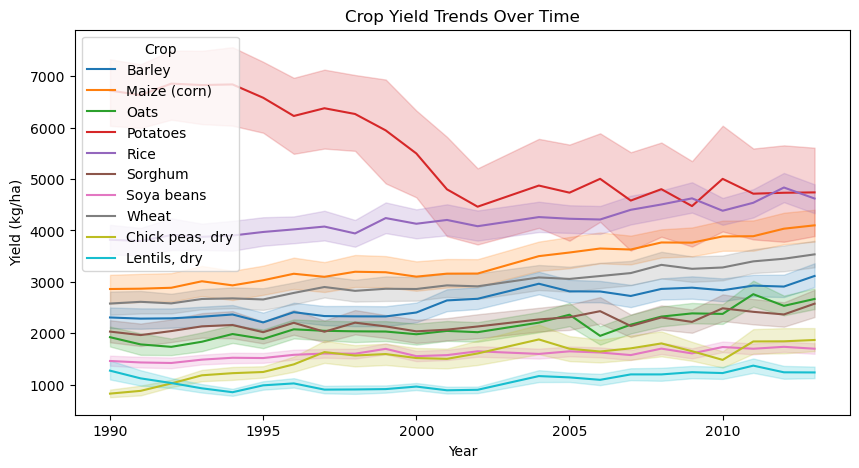

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="Value", hue="Item", data=df_yield)
plt.title("Crop Yield Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.legend(title="Crop")
plt.show()

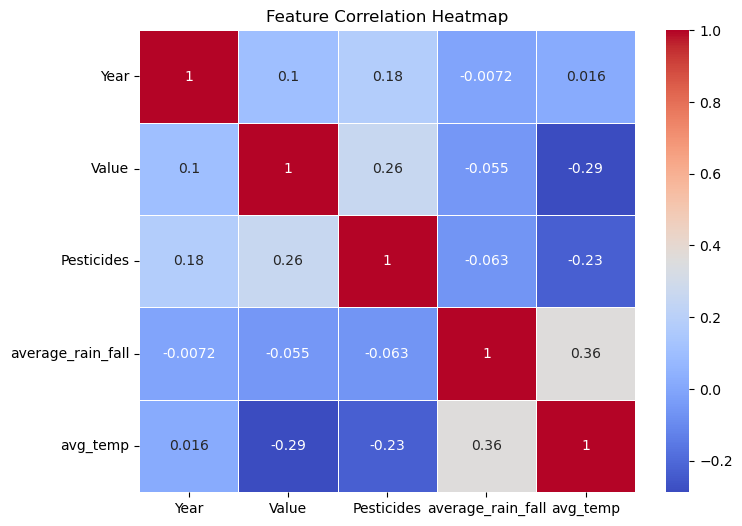

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
df_numeric = df_yield.select_dtypes(include=["number"])  # Keeps only numerical data

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

# Data Processing 

In [15]:
df_yield

,Area,Item,Year,Value,Pesticides,average_rain_fall,avg_temp
0,Albania,Barley,1990,1000.0,121.00,1485.0,16.37
1,Albania,Barley,1991,923.1,121.00,1485.0,15.36
2,Albania,Barley,1992,1380.2,121.00,1485.0,16.06
3,Albania,Barley,1993,1332.4,121.00,1485.0,16.05
4,Albania,Barley,1994,2352.3,201.00,1485.0,16.96
...,...,...,...,...,...,...,...
36737,Zimbabwe,Wheat,2009,3000.0,3269.99,657.0,20.52
36738,Zimbabwe,Wheat,2010,2778.8,3305.17,657.0,21.17
36739,Zimbabwe,Wheat,2011,2660.4,3340.35,657.0,20.78
36740,Zimbabwe,Wheat,2012,2490.2,3375.53,657.0,20.52


## Encode categories and scaling the features

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def processing_features(df):
    # Get the features and label
    features = df.iloc[:, df.columns != 'Value']

    #Convert categories
    category_col =['Area','Item']
    encoder = OneHotEncoder(sparse_output=False)
      
    encoded_data = encoder.fit_transform(features[category_col])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(category_col))

    # Reset index before merging
    features = features.reset_index(drop=True)
    encoded_df = encoded_df.reset_index(drop=True)
    
    #Concat
    features = pd.concat([features.drop(columns=category_col), encoded_df], axis=1)

    #Scaling the features 
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)

    return features

In [17]:
features = pd.DataFrame(processing_features(df_yield))
features.to_numpy()

array([[0.00000000e+00, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.34782609e-02, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.69565217e-02, 2.54431251e-04, 4.49670743e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.13043478e-01, 7.06100635e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.56521739e-01, 7.13538637e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.39014106e-03, 1.90028222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [18]:
label = df_yield['Value']
label

0        1000.0
1         923.1
2        1380.2
3        1332.4
4        2352.3
          ...  
36737    3000.0
36738    2778.8
36739    2660.4
36740    2490.2
36741    2343.0
Name: Value, Length: 32352, dtype: float64

In [19]:
features.to_csv('features.csv', index=False)

In [20]:
label.to_csv('label.csv', index=False)